
# Logistic Regression: Intuition, Math, and Optimization

---

## What is Logistic Regression?

Logistic regression is a **classification algorithm** designed to predict the probability that an input belongs to a particular category, usually binary (e.g., yes/no, 0/1).

Unlike linear regression, which predicts continuous values, logistic regression outputs probabilities constrained between 0 and 1.

---

## The Problem with Using Linear Regression for Classification

A linear regression model predicts values on the entire real line $(-\infty, +\infty)$, which doesn’t make sense for probabilities.

To solve this, logistic regression applies a **sigmoid (logistic) function** to squash linear outputs into the $[0,1]$ range.

---

## The Sigmoid Function

The sigmoid function $\sigma(z)$ is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

It transforms any real number $z$ into a value between 0 and 1:

* For large positive $z$, $\sigma(z) \approx 1$.
* For large negative $z$, $\sigma(z) \approx 0$.
* At $z=0$, $\sigma(0) = 0.5$.

---

## Model Formulation

We model the **log-odds** (logit) of the probability as a linear function of the inputs:

$$
z = \boldsymbol{\beta}^\top \mathbf{x} = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

The probability that $y=1$ given $\mathbf{x}$ is:

$$
P(y=1|\mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

We predict class 1 if $P(y=1|\mathbf{x}) \geq 0.5$, else class 0.

---

## Intuition Behind the Log-Odds

* The **log-odds** is the logarithm of the ratio of the probability of success to failure:

$$
\text{logit}(P) = \log \left( \frac{P}{1-P} \right) = \boldsymbol{\beta}^\top \mathbf{x}
$$

* This linearity in the log-odds scale allows the model to be interpreted similarly to linear regression coefficients, but in terms of odds rather than direct values.

---

## Fitting the Model: Maximum Likelihood

Given training data $\{(\mathbf{x}_i, y_i)\}_{i=1}^n$, the **likelihood** of observing the labels is:

$$
L(\boldsymbol{\beta}) = \prod_{i=1}^n \sigma(z_i)^{y_i} (1 - \sigma(z_i))^{1 - y_i}
$$

where $z_i = \boldsymbol{\beta}^\top \mathbf{x}_i$.

Taking the logarithm (log-likelihood):

$$
\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right]
$$

---

## Loss Function (Negative Log-Likelihood)

We minimize the **negative log-likelihood** (also called binary cross-entropy loss):

$$
J(\boldsymbol{\beta}) = - \ell(\boldsymbol{\beta}) = - \sum_{i=1}^n \left[y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right]
$$

This loss penalizes incorrect predictions, pushing the model towards better probabilities.

---

## Computing the Gradient

The gradient of $J(\boldsymbol{\beta})$ with respect to $\boldsymbol{\beta}$ is:

$$
\nabla_{\boldsymbol{\beta}} J = \sum_{i=1}^n (\sigma(z_i) - y_i) \mathbf{x}_i
$$

Or in matrix form:

$$
\nabla_{\boldsymbol{\beta}} J = \mathbf{X}^\top (\boldsymbol{\hat{y}} - \mathbf{y})
$$

where

* $\mathbf{X}$ is the design matrix (including intercept),
* $\mathbf{y}$ is the vector of true labels,
* $\boldsymbol{\hat{y}} = \sigma(\mathbf{X} \boldsymbol{\beta})$ is the vector of predicted probabilities.

---

## Optimization Using Gradient Descent

Since there is no closed-form solution, we iteratively update $\boldsymbol{\beta}$ using gradient descent:

$$
\boldsymbol{\beta} \leftarrow \boldsymbol{\beta} - \alpha \nabla_{\boldsymbol{\beta}} J,
$$

where $\alpha$ is the learning rate.

At each step, parameters move in the direction that reduces the loss.

---

## Intuition Behind the Updates

* If the model predicts too high a probability for a negative class ($y=0$), the gradient will push parameters to decrease that probability.
* If it predicts too low for a positive class ($y=1$), parameters update to increase the predicted probability.

---

## Summary

* Logistic regression predicts probabilities using a sigmoid applied to a linear combination of features.
* The model is fit by maximizing likelihood or equivalently minimizing cross-entropy loss.
* Gradient descent is used to find parameters since no closed-form solution exists.
* Coefficients correspond to changes in log-odds for each feature.

---



# Application to Loan Approval Dataset
- Goal is to predict whether someone will be approved for a loan based on demographic and financial data

| **Feature**                        | **Description**                                                                    |
| ---------------------------------- | ---------------------------------------------------------------------------------- |
| **person_age**                     | Age of the loan applicant (years).                                                 |
| **person_gender**                  | Gender of the applicant (e.g., Male, Female).                                      |
| **person_education**               | Highest education level attained (e.g., High School, Bachelor, Master, Doctorate). |
| **person_income**                  | Annual income of the applicant.                                                    |
| **person_emp_exp**                 | Work experience in years.                                                          |
| **person_home_ownership**          | Home ownership status (e.g., Rent, Own, Mortgage).                                 |
| **loan_amnt**                      | Amount of the loan requested.                                                      |
| **loan_intent**                    | Purpose of the loan (e.g., Debt Consolidation, Home Improvement).                  |
| **loan_int_rate**                  | Loan interest rate (%) assigned to the applicant.                                  |
| **loan_percent_income**            | Ratio of loan amount to applicant’s income.                                        |
| **cb_person_cred_hist_length**     | Length of the applicant’s credit history in months or years.                       |
| **credit_score**                   | Credit score evaluating applicant’s creditworthiness.                              |
| **previous_loan_defaults_on_file** | Binary indicator if the applicant has past loan defaults (Yes/No).                 |
| **loan_status**                    | Target variable — 1 if loan approved, 0 if rejected.       

## EDA

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib


import sys
sys.path.append("/Users/rykerdolese/Documents/INDE 577/Data-Science-and-Machine-Learning/src")
#importlib.reload(mlpackage)

from mlpackage import LogisticRegression
from mlpackage.preprocess import train_test_split, StandardScaler, OrdinalEncoder


## Load Dataset
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()
loan_df_small = loan_df.sample(4000, random_state=42)

In [2]:
loan_df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 37979 to 25182
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      4000 non-null   float64
 1   person_gender                   4000 non-null   object 
 2   person_education                4000 non-null   object 
 3   person_income                   4000 non-null   float64
 4   person_emp_exp                  4000 non-null   int64  
 5   person_home_ownership           4000 non-null   object 
 6   loan_amnt                       4000 non-null   float64
 7   loan_intent                     4000 non-null   object 
 8   loan_int_rate                   4000 non-null   float64
 9   loan_percent_income             4000 non-null   float64
 10  cb_person_cred_hist_length      4000 non-null   float64
 11  credit_score                    4000 non-null   int64  
 12  previous_loan_defaults_on_file  40

In [3]:
loan_df_small.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,27.773000,77918.354250,5.467500,9678.364500,11.037835,0.142400,5.887250,633.483500,0.237750
std,6.043269,50197.717057,6.023082,6414.982418,2.935967,0.088583,3.924396,50.558009,0.425758
min,20.000000,8000.000000,0.000000,500.000000,5.420000,0.000000,2.000000,435.000000,0.000000
25%,24.000000,46690.500000,1.000000,5000.000000,8.877500,0.070000,3.000000,602.000000,0.000000
50%,26.000000,66834.500000,4.000000,8000.000000,11.010000,0.120000,4.000000,641.000000,0.000000
75%,30.000000,93074.250000,8.000000,12685.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,123.000000,677591.000000,100.000000,35000.000000,20.000000,0.660000,30.000000,759.000000,1.000000


In [4]:
## Let's subset to 4 explanatory variables for simplicity
loan_df_small = loan_df_small[['person_age', 'person_education', 'previous_loan_defaults_on_file', 'person_income', 'loan_amnt', 'credit_score', 'loan_status']]

/opt/anaconda3/envs/dl_env/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/dl_env/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/dl_env/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/dl_env/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/dl_env/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/dl_env/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.ve

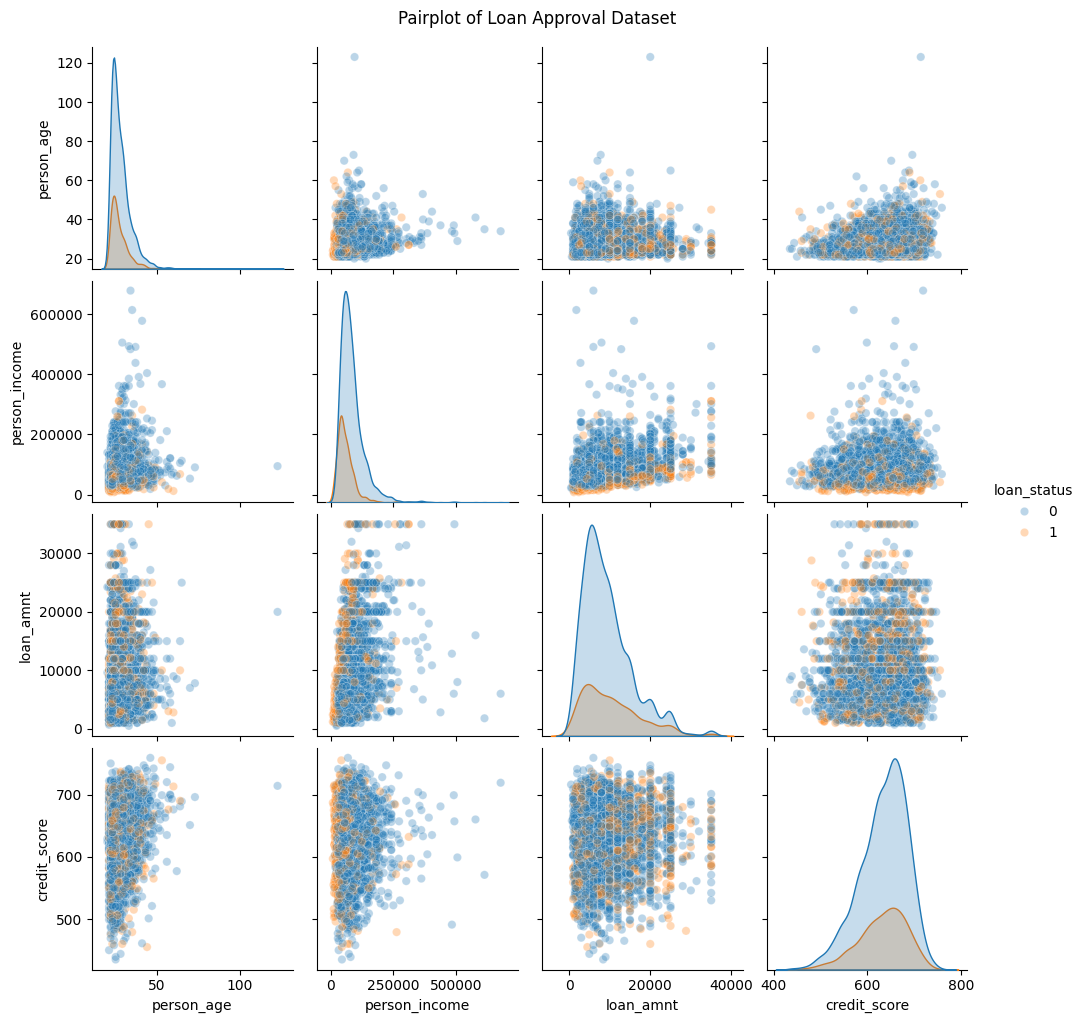

In [5]:
## Pairplot to visualize relationships
sns.pairplot(loan_df_small, hue='loan_status', vars=['person_age', 'person_income', 'loan_amnt', 'credit_score'], plot_kws={'alpha': 0.3})
plt.suptitle('Pairplot of Loan Approval Dataset', y=1.02)

plt.show()

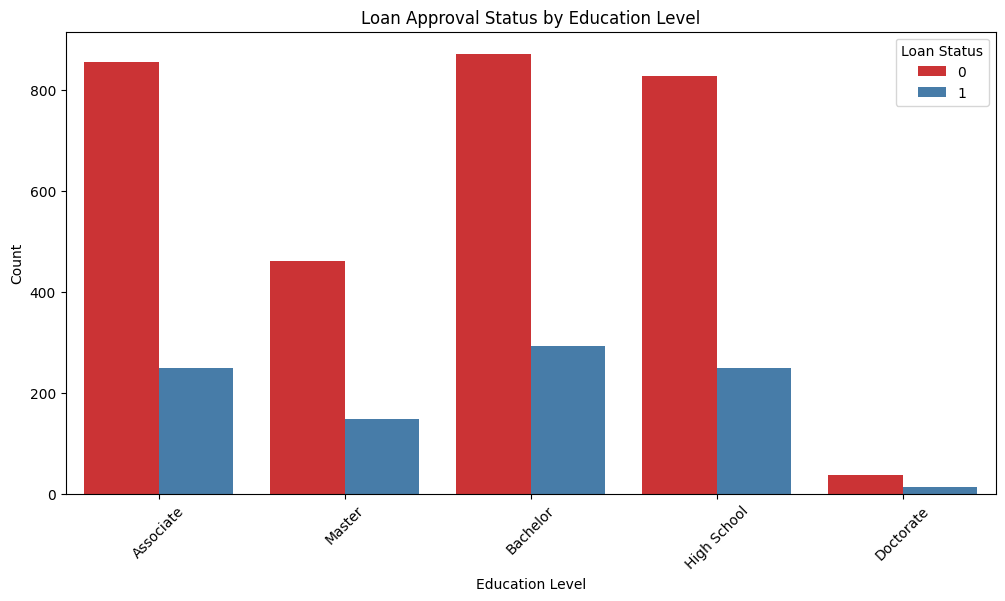

In [6]:
# Proportion of Approved Loans for differen categories of Education and previous defaults
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_df_small, x='person_education', hue='loan_status', palette='Set1')
plt.title('Loan Approval Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

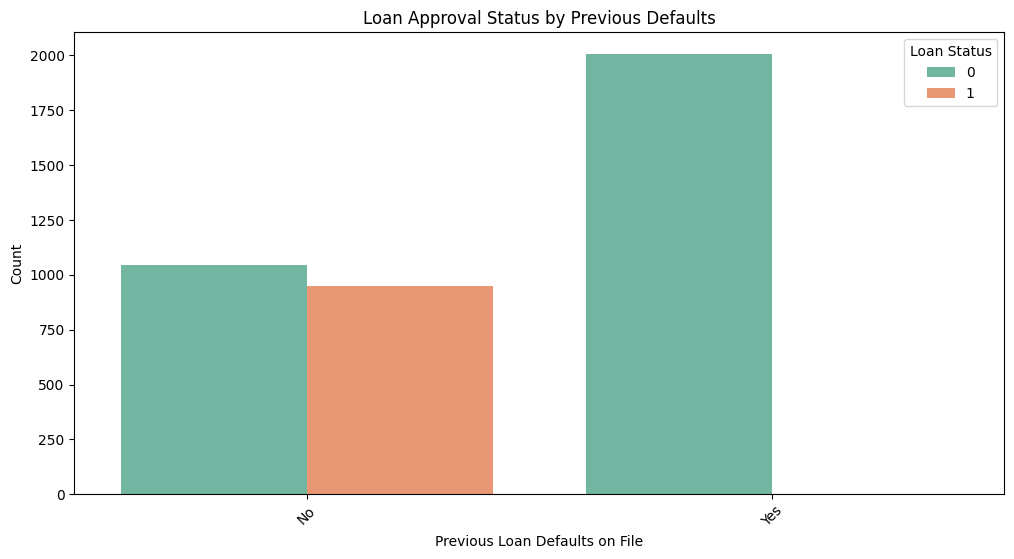

In [7]:
# Previous defaults and their impact on loan approval
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_df_small, x='previous_loan_defaults_on_file', hue='loan_status', palette='Set2')
plt.title('Loan Approval Status by Previous Defaults')
plt.xlabel('Previous Loan Defaults on File')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Encoding categorical variables; ordinal encoding for 'person_education' and 'previous_loan_defaults_on_file'
categories = [
    ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'],
    ['No', 'Yes']
]

ordinal_encoder = OrdinalEncoder(categories=categories)

# This assumes 'person_education' has categories in the order of education level and 'previous_loan_defaults_on_file' has 'No' and 'Yes'.
X, y = loan_df_small.drop('loan_status', axis=1), loan_df_small['loan_status']
X[['person_education', 'previous_loan_defaults_on_file']] = ordinal_encoder.fit_transform(X[['person_education', 'previous_loan_defaults_on_file']])

# Splitting the dataset into training and testing sets
X_train = X.sample(frac=0.8, random_state=42)
X_test = X.drop(X_train.index)
y_train = y[X_train.index]
y_test = y.drop(X_train.index)

In [9]:
## Standardize variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(learning_rate=0.01, n_iterations=50000)
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)
train_accuracy = log_reg.accuracy(y_train.values, y_pred_train)
test_accuracy = log_reg.accuracy(y_test.values, y_pred_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Iteration 0, Loss: 1.1680874412550901
Iteration 1000, Loss: 0.38155880661341135
Iteration 2000, Loss: 0.33721616160811324
Iteration 3000, Loss: 0.3223159478346714
Iteration 4000, Loss: 0.3148793985736335
Iteration 5000, Loss: 0.3104993241097275
Iteration 6000, Loss: 0.30765777970218616
Iteration 7000, Loss: 0.30568906393879736
Iteration 8000, Loss: 0.30425704559544176
Iteration 9000, Loss: 0.30317519259005293
Iteration 10000, Loss: 0.30233260674521023
Iteration 11000, Loss: 0.30165974893671527
Iteration 12000, Loss: 0.30111110154082854
Iteration 13000, Loss: 0.3006557878504122
Iteration 14000, Loss: 0.30027221700080575
Iteration 15000, Loss: 0.29994488937122377
Iteration 16000, Loss: 0.29966241898259055
Iteration 17000, Loss: 0.2994162697673989
Iteration 18000, Loss: 0.29919992531224004
Iteration 19000, Loss: 0.299008329824272
Iteration 20000, Loss: 0.29883750334462755
Iteration 21000, Loss: 0.29868427157522454
Iteration 22000, Loss: 0.2985460727133688
Iteration 23000, Loss: 0.29842081

In [10]:
## Interpretation of Results & Learned Parameters
print("Learned Weights:", log_reg.weights)
print("Learned Bias:", log_reg.bias)


Learned Weights: [-0.07278915  0.11359625 -3.1198967  -1.23908868  0.59969015 -0.44871836]
Learned Bias: [-3.46565168]


## Interpretation of Logistic Regression Results

### Loss Reduction:
- The loss steadily decreases over iterations, starting at **0.3007** at iteration 13,000 and reaching **0.2971** at iteration 49,000. This indicates that the model is converging and improving its fit to the training data.

### Training and Testing Accuracy:
- **Training Accuracy:** 85.56%  
- **Testing Accuracy:** 85.62%  
The model performs consistently on both the training and testing datasets, suggesting it generalizes well without overfitting.

### Learned Parameters:
- **Weights:**  
  - `person_age`: -0.0694  
  - `person_education`: 0.1039  
  - `previous_loan_defaults_on_file`: -3.1169  
  - `person_income`: -1.2402  
  - `loan_amnt`: 0.6010  
  - `credit_score`: -0.4402  
- **Bias:** -3.4640  

### Summary:
- The weights indicate the direction and magnitude of each variable's impact on loan approval probability. For example:
  - **`previous_loan_defaults_on_file`** has a strong negative impact, reducing the likelihood of loan approval.
  - **`loan_amnt`** positively influences approval probability.
- The bias represents the baseline prediction when all features are zero.

In [152]:
## Comparison with sklearn's LogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
sklearn_log_reg = SklearnLogisticRegression(max_iter=500000, solver='lbfgs')
sklearn_log_reg.fit(X_train, y_train)
y_pred_train_sklearn = sklearn_log_reg.predict(X_train)
y_pred_test_sklearn = sklearn_log_reg.predict(X_test)
train_accuracy_sklearn = sklearn_log_reg.score(X_train, y_train)
test_accuracy_sklearn = sklearn_log_reg.score(X_test, y_test)
print(f"Sklearn Training Accuracy: {train_accuracy_sklearn * 100:.2f}%")
print(f"Sklearn Testing Accuracy: {test_accuracy_sklearn * 100:.2f}%")

Sklearn Training Accuracy: 85.62%
Sklearn Testing Accuracy: 85.50%


In [153]:
## sklearn parameters
print("Sklearn Weights:", sklearn_log_reg.coef_)
print("Sklearn Intercept:", sklearn_log_reg.intercept_)

Sklearn Weights: [[-0.07043344  0.1041052  -3.45657881 -1.23910534  0.60021857 -0.44231691]]
Sklearn Intercept: [-3.80934161]


Very similar results!

## Visualizing the Logistic Curve
- Here, we're going to use the iris dataset for a binary classification with a model using one explanatory variable
- Because this dataset is small and the classes are easily separable, we can produce a logistic curve that shows the given probabilities along the explanatory variable axis

Iteration 0, Loss: 1.3863253863451286
Iteration 1000, Loss: 0.7025441972245647
Iteration 2000, Loss: 0.6845371147679682
Iteration 3000, Loss: 0.6676827374064496
Iteration 4000, Loss: 0.6519043796074127
Iteration 5000, Loss: 0.6371284420375488
Iteration 6000, Loss: 0.6232848444064564
Iteration 7000, Loss: 0.6103073050969002
Iteration 8000, Loss: 0.5981334915184019
Iteration 9000, Loss: 0.5867050650320813
Iteration 10000, Loss: 0.5759676427992437
Iteration 11000, Loss: 0.5658706965625447
Iteration 12000, Loss: 0.5563674056182921
Iteration 13000, Loss: 0.5474144784029611
Iteration 14000, Loss: 0.5389719544100332
Iteration 15000, Loss: 0.5310029957015819
Iteration 16000, Loss: 0.5234736751441474
Iteration 17000, Loss: 0.5163527666967092
Iteration 18000, Loss: 0.509611541597279
Iteration 19000, Loss: 0.5032235731045891
Iteration 20000, Loss: 0.4971645515154066
Iteration 21000, Loss: 0.49141211045710964
Iteration 22000, Loss: 0.48594566491177305
Iteration 23000, Loss: 0.48074626102814355
Ite

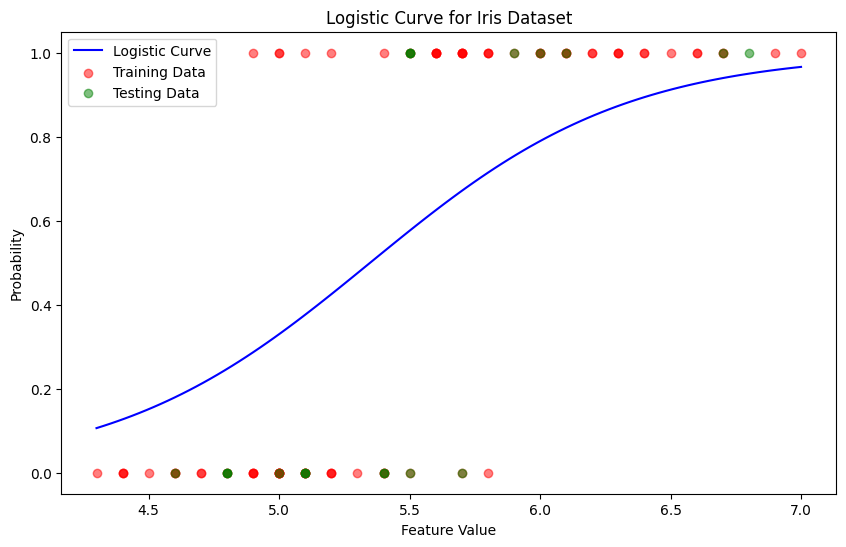

In [185]:
# Let's read in the iris dataset for a simple binary classification example
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data[iris.target != 2][:, 0]) # Only take the first two classes
y = iris.target[iris.target != 2]  # Only take the first two classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use our logistic regression model
log_reg_iris = LogisticRegression(learning_rate=0.01, n_iterations=50000)
log_reg_iris.fit(X_train, y_train)
y_pred_train_iris = log_reg_iris.predict(X_train)
y_pred_test_iris = log_reg_iris.predict(X_test)
train_accuracy_iris = log_reg_iris.accuracy(y_train, y_pred_train_iris)
test_accuracy_iris = log_reg_iris.accuracy(y_test, y_pred_test_iris)
print(f"Iris Training Accuracy: {train_accuracy_iris * 100:.2f}%")
print(f"Iris Testing Accuracy: {test_accuracy_iris * 100:.2f}%")    

# Visualize the logistic curve for the iris dataset
plt.figure(figsize=(10, 6))
x_values = np.linspace(X_train.min(), X_train.max(), 100)

y_values = log_reg_iris.sigmoid(np.dot(x_values.reshape(-1,1), log_reg_iris.weights) + log_reg_iris.bias)
plt.plot(x_values, y_values, label='Logistic Curve', color='blue')
plt.scatter(X_train, y_train, c='red', label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, c='green', label='Testing Data', alpha=0.5)
plt.title('Logistic Curve for Iris Dataset')
plt.xlabel('Feature Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

We can see that when the feature value is smaller, there is a tendency for the true value to correspond to the '0' class and the opposite for high feature values. The Sigmoid function accounts for this observation!